# 02-Regression - Homework

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Getting the data
For this homework, we'll use the Laptops Price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv).

In [ ]:
# Will skip this test as we already have the laptops.csv file downloaded in the dataset directory from our previous homework
!wget -P ../../datasets/ "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"

In [2]:
laptops_df = pd.read_csv("../../datasets/laptops.csv")
laptops_df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


## Preparing the dataset
1. Normalizing the column names

In [3]:
laptops_df.columns = laptops_df.columns.str.lower().str.replace(' ', '_')
laptops_df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [4]:
string_column = list(laptops_df.dtypes[laptops_df.dtypes == 'object'].index)
string_column

['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [5]:
for col in string_column:
    laptops_df[col] = laptops_df[col].str.lower().str.replace(' ', '_')

In [6]:
laptops_df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


Next, use only the following columns:

- `'ram'`,
- `'storage'`,
- `'screen'`,
- `'final_price'`

In [7]:
df = laptops_df[['ram', 'storage', 'screen', 'final_price']].copy()
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


## EDA
- Look at the `final_price` variable. Does it have a long tail?

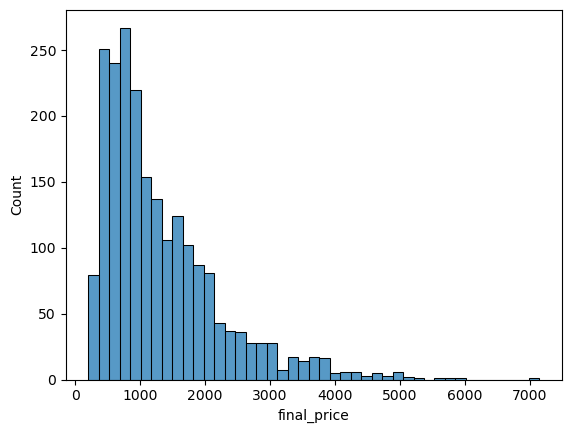

In [8]:
sns.histplot(df['final_price'])
plt.show()

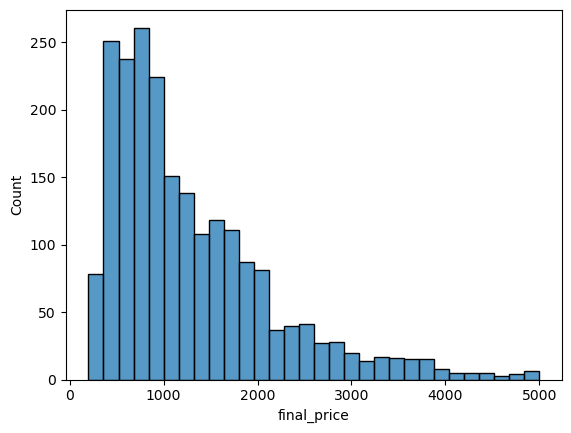

In [9]:
sns.histplot(df['final_price'][df['final_price'] <= 5000])
plt.show()

## Question 1
There's one column with missing values. What is it?

- `'ram'`
- `'storage'`
- `'screen'`
- `'final_price'`

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


In [11]:
df[df.columns].isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

## Question 2
What's the median (50% percentile) for variable 'ram'?

- 8
- 16
- 24
- 32

In [12]:
df['ram'].median()

16.0

## Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [13]:
def prepare_datasets(seed):
    # Steps to calculate the split sizes for Train, Validate and Test datasets
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    # Shuffling the dataset
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    # Steps to create train, valid, and test datasets
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    # Resetting the index of the datasets after shuffling
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # Creating a target variable (final_price) from the predictor variables
    y_train = df_train['final_price'].values
    y_val = df_val['final_price'].values
    y_test = df_test['final_price'].values
    
    # Removing the target variable from the datasets
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    return df_train, df_val, df_test, y_train, y_val, y_test

In [14]:
# Steps to train linear regression model
def train_linear_regression(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX_inv = np.linalg.inv(X.T.dot(X) + r * np.eye(X.shape[1]))
    w = XTX_inv.dot(X.T).dot(y)
    return (w[0], w[1:])

# Steps for prediction using Linear regression function
def linear_regression_model(X, w0, w):
    return w0 + X.dot(w)

# Calculate RMSE
def rmse(y, y_pred):
    return np.sqrt(((y - y_pred) ** 2).mean())

## Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using `round(score, 2)`
- Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [15]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_datasets(seed=42)

In [16]:
# With missing values set to 0
X_train_zero = df_train.fillna(0, inplace=False).values
X_val_zero = df_val.fillna(0, inplace=False).values
X_test_zero = df_test.fillna(0, inplace=False).values

In [17]:
# Training linear regression model and calculating RSME while replacing the missing value with 0
w0, w = train_linear_regression(X_train_zero, y_train)
y_pred = linear_regression_model(X_val_zero, w0, w)
round(rmse(y_val, y_pred), 2)

597.36

In [18]:
# With missing values set to mean
mean_value = df_train['screen'].mean()

X_train_mean = df_train.fillna(mean_value, inplace=False).values
X_val_mean = df_val.fillna(mean_value, inplace=False).values
X_test_mean = df_test.fillna(mean_value, inplace=False).values

In [19]:
w0, w = train_linear_regression(X_train_mean, y_train)
y_pred = linear_regression_model(X_val_mean, w0, w)
round(rmse(y_val, y_pred), 2)

600.27

## Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which `r` gives the best RMSE?
- If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [20]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# Calculating the RSME for each value of r
for r in r_values:
    w0, w = train_linear_regression(X_train_zero, y_train, r=r)
    y_pred = linear_regression_model(X_val_zero, w0, w)
    print('r: %s\t rmse:%s' % (r, round(rmse(y_val, y_pred), 2)))

r: 0	 rmse:597.36
r: 0.01	 rmse:597.36
r: 0.1	 rmse:597.35
r: 1	 rmse:597.21
r: 5	 rmse:597.01
r: 10	 rmse:597.06
r: 100	 rmse:597.9


For question 4, the least RSME is for r=5 but from the given set of options, the least RSME is for r=10

## Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
- Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [21]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
validation_scores = []
for seed in seed_values:
    # Steps to create train, valid, and test sets with the current seed value
    df_train, df_val, df_test, y_train, y_val, y_test = prepare_datasets(seed=seed)

    # Creating datasets replacing NaN values with 0
    X_train_zero = df_train.fillna(0, inplace=False).values
    X_val_zero = df_val.fillna(0, inplace=False).values
    
    # Training linear regression model and computing the validation RMSE
    w0, w = train_linear_regression(X_train_zero, y_train)
    y_pred = linear_regression_model(X_val_zero, w0, w)
    validation_scores.append(rmse(y_val, y_pred))

# Calculating the standard deviation of the validation RMSE across seed values
round(np.std(validation_scores), 3)

29.176

## Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with `r=0.001`.
- What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [22]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_datasets(seed=9)

# Combining the train and validation datasets
df_full_train = pd.concat([df_train, df_val]).fillna(0).reset_index(drop=True)
X_full_train = df_full_train.values
y_full_train = np.concatenate([y_train, y_val])

# Creating datasets replacing NaN values with 0
X_test_zero = df_test.fillna(0, inplace=False).values

# Training linear regression model and computing the validation RMSE
w0, w = train_linear_regression(X_full_train, y_full_train)
y_pred = linear_regression_model(X_test_zero, w0, w)
round(rmse(y_test, y_pred), 2)

608.61